# INFO 2950 Fall 2024 Homework 5

For each answer code cell, **do not** erase the line stating `#A1: your code here`; instead, write your answer code directly below the line.

When you turn in this homework, all cells must be executed and the notebook saved with output included. You must also save your **fully executed notebook** as a pdf following the instructions in the Student Handbook posted on Canvas > Modules > Course Policies. You will turn in this notebook without any of the data files. 

A **fully executed notebook** means that you should be seeing the expected output printed below the cell after you click "Restart Kernel and Run All Cells." *If any cell in the PDF of your notebook does not have the expected output printed below it, it will not be considered fully executed and you will not receive points for the questions in that cell.*

**If you use any sources aside from the standard documentation of Python libraries, you must cite the sources (e.g., StackOverflow links) used to answer the below questions. If you use ChatGPT, you must include proof of the prompt you used, as well as an explanation of why the resulting code is correct.**

In this homework, you will recreate confidence intervals for regression coefficients using a real world dataset of automobiles. You will practice creating different probability distributions, calculating joint and conditional probabilities, and applying Bayes' rule.

Part of this homework will involve practicing how to use online resources. *Nobody* remembers everything. There is no level of experience that will allow you to never use documentation and question-answer forums. The key is to use these in ways that help you grow your skills, not in ways that prevent you from growing. They also provide an opportunity to express gratitude for people who helped you.

**NetID:** kl739

---

## Problem 0
Do not move or modify this cell, we use it for automated homework analysis.

**This problem is for you to use to cite your sources.**

You will update this problem over the course of the homework. Describe problems, error messages, and bugs you encountered, and how you fixed or addressed them. List URLs for any online resources (like Stack Overflow) you found useful and mention fellow students, TAs, or other people who helped you. If you use ChatGPT, you must include proof of the prompt you used, as well as an explanation of why the resulting code is correct. If you do not appropriately fill out Problem 0, you will receive 0 points on the entire homework assignment.



**ADD YOUR SOURCES HERE**

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker
from scipy.stats import binom, poisson, norm
from numpy import random
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import math
from scipy.special import comb

**Note:** If you receive a `ModuleNotFoundError: No module named 'statsmodels'` when you run the import statements above, you should:
1. Uncomment and run the below cell: `%pip install scikit-learn`
2. Click 'Kernel > Restart Kernel and Clear Outputs of All Cells...'
4. Rerun the import statements

In [2]:
#%pip install statsmodels

# Section A: Regression Tables, Confidence Intervals, and Bootstrapping
In the following set of problems we are going to explore regression tables and recreate the confidence intervals of regression coefficients using the [`mpg_data.csv`](https://archive.ics.uci.edu/dataset/9/auto+mpg) dataset. This dataset is a classic dataset used for learning statistics - it was [used at the 1983 American Statistical Association Exposition](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=4f9e6b13e22ae8f3d77b1f5d1c946179e3abfd64), has been part of CMU StatLib since at least the 1990s, and is currently available on the UCI ML repository. 

Our goal is to predict `mpg` (miles traveled per gallon of gas used) of a car. For simplicity we are going to include only 1 input variable: `weight` (in lbs).

Throughout this section, we will not ask you to produce train/test splits. Instead, we are interested in evaluating the variance of our predictions, i.e. our **confidence** in our predictions. To do this, we will use **boostrapping.**

In [3]:
# Given code
cars = pd.read_csv('mpg_data.csv')
cars = cars.dropna(subset=["mpg", "weight"])
print(cars.shape)

(398, 8)


## Problem A1 (3 points)
Use `sns.regplot()` to plot the data and linear regression model fit between `weight` and `mpg`.

Specify the following arguments:
- data: `cars`
- x-axis: `weight`
- y-axis: `mpg`
- n_boot: `30`

For readability, we want our `weight` numbers to be displayed with commas (`4,000` instead of `4000`). To do this:
1. Name your `sns.regplot()` variable `ax`.
2. Run `ax.get_xaxis().set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))`

After incorporating step 2, you should see that the values on the x-axis are listed with commas.

The other arguments may be left as default.

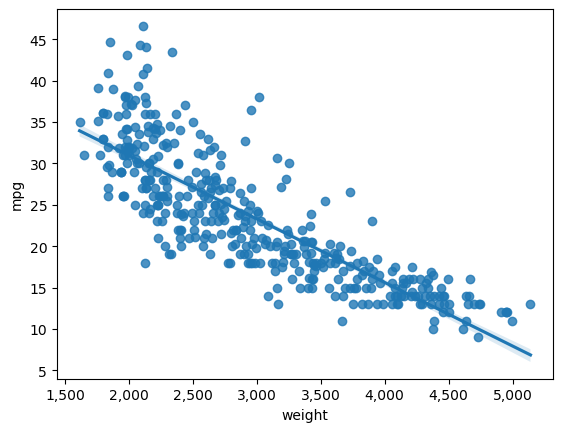

In [4]:
# A1: your code here
ax = sns.regplot(data = cars, x = cars['weight'], y = cars['mpg'], n_boot = 30)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

## Problem A2 (2 points)
Uh oh! It looks like something is wrong with the fit of our regression line. In one sentence, please describe what it is.

Hint: Consider whether the relationship between weight and mpg appears to follow a straight line or if another type of relationship might be more appropriate.

**A2: Your answer here**
The regression line doesn't fit well because weight and mpg does not follow a linear path; a transform is needed in order to plot the data so that the regression line fits (perhaps a linear-log or a log-log).

## Problem A3 (2 points)
To fix this, let's log-transform each variable. In the `cars` dataset, create a new column called `log_weight` that is equal to the natural log of `weight`. Create a new column called `log_mpg` that is equal to the natural log of `mpg`. 

Then, recreate the scatterplot from A1 (but don't change the formatting of the x-axis this time) using the `log_weight` and `log_mpg` columns to verify that the relationship is now linear.

Limit the y-axis to values ranging from 2.25 to 3.75 using `plt.ylim()`.

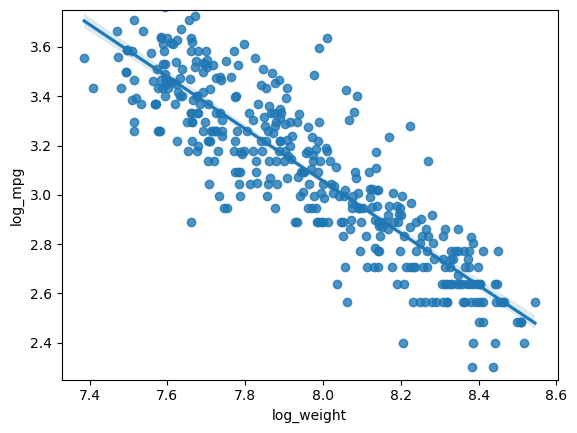

In [5]:
# A3: your code here
cars['log_weight'] = np.log(cars['weight'])
cars['log_mpg'] = np.log(cars['mpg'])

ax = sns.regplot(data = cars, x = cars['log_weight'], \
                 y = cars['log_mpg'], n_boot = 30)
plt.ylim(2.25, 3.75)
plt.show()

## Problem A4 (4 points)

We would like to get a summary of the regression model including information such as coefficients, standard errors, significance levels, etc. for each covariate. The `statsmodels` module provides an easy way for us to get this information.

Use the `OLS()` function of `statsmodels.api` (imported as `sm` in the first cell) to train an OLS linear regression model to predict car `log_mpg` with `log_weight`, using the full `cars` dataframe. Make sure your model includes an intercept (Hint: this is the "constant" value).

Model: `log_mpg` = $\alpha$ + $\beta$ `log_weight`

Print the regression table.

In [6]:
# A4: your code here
X = sm.add_constant(cars['log_weight'])
y = cars['log_mpg']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_mpg   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1287.
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          1.75e-126
Time:                        21:04:15   Log-Likelihood:                 153.46
No. Observations:                 398   AIC:                            -302.9
Df Residuals:                     396   BIC:                            -294.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5219      0.235     49.056      0.0

**A4 Expected Output:**

```
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_mpg   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1287.
Date:                Tue, 08 Oct 2024   Prob (F-statistic):          1.75e-126
Time:                        22:24:28   Log-Likelihood:                 153.46
No. Observations:                 398   AIC:                            -302.9
Df Residuals:                     396   BIC:                            -294.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5219      0.235     49.056      0.000      11.060      11.984
log_weight    -1.0583      0.029    -35.874      0.000      -1.116      -1.000
==============================================================================
Omnibus:                       10.762   Durbin-Watson:                   0.765
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               13.126
Skew:                           0.275   Prob(JB):                      0.00141
Kurtosis:                       3.699   Cond. No.                         230.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
```
*Note: your `Date` and `Time` values will be different from ours.*

## Problem A5 (2 points)
1. In one sentence, interpret the coefficient of `log_weight`.
2. In one sentence, interpret the significance of the coefficient of `log_weight`: can you reject the null hypothesis for the relationship between `log_mpg` and `log_weight`?

**A5: your answer here**
1. When `log_mpg` increases by one unit, `log_weight` decreases by -1.0583 units.
2. We can reject the null hypothesis for the relationship between `log_mpg` and `log_weight` because the coefficient for `log_weight` is non-zero, meaning that there is a significant (negative) relationship between `log_mpg` and `log_weight`. 

## Problem A6 (3 points)

Next, we will try to manually recreate the confidence interval in the figure from Problem A3.

Using a for loop, create `30` bootstrapped samples of the `cars` dataframe using the Pandas function [`sample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html). Append each bootstrapped dataframe to a list called `bootstrapped_cars`. Remember the two components of bootstrapping: the number of items in the bootstrapped samples is the same, and bootstrapped sampling occurs with replacement.

*Note:* we have set up the loop for you to fill in below. Inside the loop, simply add code to produce each bootstrapped sample.

In [7]:
# Given code
np.random.seed(2950)

# Given code
bootstrapped_cars = list()
for i in range(30):
    # A6: your code here
    samples = cars.sample(n = 398, replace = True)
    bootstrapped_cars.append(samples)

# Given code
print(f"Length of bootstrapped_cars: {len(bootstrapped_cars)}")
print(f"Shape of a bootstrapped df: {bootstrapped_cars[0].shape}")

Length of bootstrapped_cars: 30
Shape of a bootstrapped df: (398, 10)


**A6 Expected Output:**

```
Length of bootstrapped_cars: 30
Shape of a bootstrapped df: (398, 10)
```

## Problem A7 (3 points)

Use a for loop to loop over `bootstrapped_cars`. For each bootstrapped dataframe, do the following:

1. Fit a scikit-learn `LinearRegression()` with `log_weight` as the input variable and `log_mpg` as the output variable. Name the variable `bt_model`.
2. Create a variable `y_pred` by using `bt_model` to make predictions on the logged weight values in the `domain` variable.
3. Use `sns.lineplot()` to plot the regression line fitted on each bootstrapped df. Specify the following for your plot:
    - x-axis: `domain.reshape(-1)` (we reshape here because we need a 1-dimensional array for plotting)
    - y-axis: `y_pred`
    - color: `lightgreen`
    - alpha: `0.3`

*Hint:* The shape of your regression lines should look similar to those in Problem A3. 

Limit the y-axis to values ranging from 2.25 to 3.75 using `plt.ylim()`.

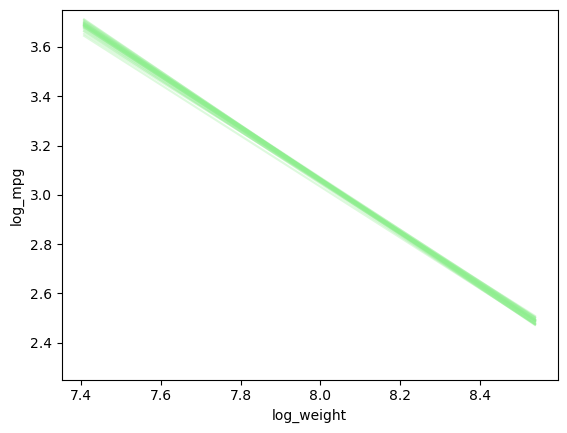

In [8]:
# Given code
domain = np.array([[math.log(1650)], [math.log(5100)]])

for i in range(30):
    df = bootstrapped_cars[i]
    
    # A7: your code here
    X = df[['log_weight']].values.reshape(-1, 1)
    y = df['log_mpg'].values

    bt_model = LinearRegression().fit(X, y)
    y_pred = bt_model.predict(domain)
    sns.lineplot(x = domain.reshape(-1), y = y_pred, \
                 color = 'lightgreen', alpha = 0.3)
    plt.ylim(2.25, 3.75)

# Given code
plt.xlabel("log_weight")
plt.ylabel("log_mpg")
plt.show()

## Problem A8 (1 point)

Are you more confident in the trained `bt_model`'s `mpg` predictions when the car `weight` is between 1600-1800 (when `log_weight` is between 7.4-7.5) or when the car `weight` is between 3000-3300 (when `log_weight` is between 8.0-8.1)? Why? Explain your answer in one sentence.

**A8: your answer here**
I am more confident in the trained `bt_model`'s mpg predictions when the car `weight` is between 3000-3300 because it is closer to the center of the data range/center of the regression line where there are more data points than when the car `weight` is between 1600-1800.

# Section B: Binomial Distribution and Margin of Error

### Probability Models Cheatsheet
| Model | Example | Random Variable | Parameters | Probability Mass Function |
| --- | --- | --- | --- | --- |
| Binomial | flip a coin n times | $X$ = number of successful coin flips {0, 1, ..., n} | $n$ = number of trials, $p$ = probability | $\binom{n}{x} p^x (1-p)^{n-x} $|
| Geometric | flip a coin until success | $X$ = number of failures before success {0, 1, ..., k} | $k$ = number of trials, $p$ = probability | $p(1-p)^{k-1}$ |
| Poisson | number of successful coin flips within a fixed interval | $X$ = number of events within a fixed interval | $k$ = number of events, $\lambda$ = rate parameter | $\dfrac{\lambda^ke^{-\lambda}}{k!}$ |
| Negative Binomial | number of coin flips to reach a number of successes | $X$ = number of trials until the $r^{th}$ success| $x$ = number of trials, $r$ = number of successes, $p$ = probability | $\binom{x-1}{r-1}(1-p)^{x-r}p^r$


---

## Problem B1 (3 points)

Calculate the probability for each of the following scenarios.

For each scenario, determine which probability model to use and whether you should use the CDF or PMF. Each answer should be one line of code that uses a function from `scipy.stats`. For example, here's the documentation for [SciPy's binomial functions](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html). Round all outputs to five decimal points. *Do not transform the probabilities into percentages (i.e., report 0.5 and not 50%).*

1. You decide to live on the edge and guess your way through your INFO 2950 final. The good news is the final is all True/False questions* (so each question has only two options). If you guess completely randomly on each question and the exam is 50 questions long, what is the probability that you get a 60% or lower (uncurved) on your final?
2. [Collegetown Bagels](https://www.collegetownbagels.com//) is open 7 days per week. Each day, there is a 20% chance that they have a double chocolate muffin available. If your TA calls Collegetown Bagels every day for 7 days, what is the probability that she successfully manages to purchase a double chocolate muffin exactly once?
3. For every job interview you receive, you have a 30% chance of getting a offer. If you get 18 interviews, what is the probability that you get at least 6 job offers?

*The final will not actually be all True/False questions!

In [9]:
# B1 1: your code here 
print(round(binom.cdf(n = 50, p = 0.5, k = 30), 5))

0.94054


In [10]:
# B1 2: your code here 
print(round(binom.pmf(n = 7, p = 0.2, k = 1), 5))

0.367


In [11]:
# B1 3: your code here 
print(round(1 - binom.cdf(n = 18, p = 0.3, k = 5), 5))

0.46562


## Problem B2 (2 points)
We want to survey the residents of Ithaca on restaurant preferences. There are 30,000 people in Ithaca, and it turns out they have excellent taste. But some residents prefer restaurants in Collegetown while others are partial to restaurants in downtown Ithaca. With probability `p=0.5`, the favorite restaurant of each resident is "Lev Kitchen" in downtown Ithaca otherwise it is "What the Falafel" in Collegetown. 

To simulate the residents' restaurant preferences, generate a random binomial distribution using `np.random.binomial`, with `n=1` trial (each trial denoting a resident deciding their favorite restaurant), `p=0.5`, and `size=30000`. Name this distribution `random_binomial`.  

Calculate and print the mean of the numbers in `random_binomial`, representing the percent of Ithaca residents whose favorite restaurant is Lev Kitchen. Round the mean to five decimal places.

Please make sure to keep in the random state of `2950` we've included using the `np.random.seed()` function.

In [12]:
# Given code
np.random.seed(2950)

# B2: your code here
random_binomial = np.random.binomial(n = 1, p = 0.5, size = 30000)
print(f"Mean of random binomial distribution: {round(random_binomial.mean(), 5)}")

Mean of random binomial distribution: 0.50047


**B2 Expected Output:**
```
Mean of random binomial distribution: 0.50047
```

## Problem B3 (4 points)

We want to survey Ithacans to find out their favorite restaurant (and to estimate the sampling distribution of restaurant preference). We want to survey 30 Ithacans 100 different times, which means that in each round of the survey, a new random sample of 30 respondents is selected from the pool of Ithacans, with replacement (i.e., respondents can be chosen in multiple rounds).

Generate a random variable called `survey_means`. First, use [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) to sample from `random_binomial`. Set the `size` parameter to `(100, 30)`. Then, take the mean of each set of 30, so that you're left with 100 sample means. (Note: To not overcomplicate this, the sampling with replacement can also occur within survey rounds, i.e. the same person can be chosen in the same survey round [although unlikely]. Note that this is not realistic, but for the purposes of this homework, don't worry about it. )

*Hint:* Use the `axis=1` argument to take the mean of each sample separately.

Then, plot a histogram of `survey_means` using `plt.hist()`. Name your x-axis `Survey Mean` and y-axis `Frequency`.

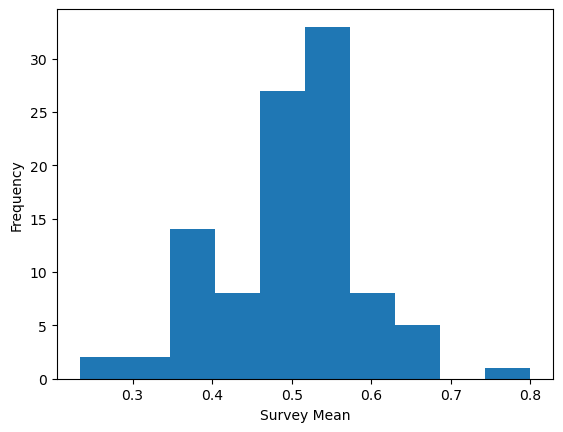

In [13]:
# Given code
np.random.seed(2950)

# B3: your code here
survey_means = np.mean(np.random.choice(random_binomial, \
                    size = (100, 30), replace = True), axis = 1)
plt.hist(survey_means)
plt.xlabel('Survey Mean')
plt.ylabel('Frequency')
plt.show()

## Problem B4 (2 points)

Using `numpy`, calculate the mean and standard deviation of `survey_means`. As discussed in lecture, the standard error is the standard deviation of the bootstrap distribution. As a result, save the standard deviation to a variable `SE`. 

Print the mean and the SE, both rounded to 3 decimal places.

In [14]:
# B4: your code here
mean = round(np.mean(survey_means), 3)
SE = round(np.std(survey_means), 3)
print(f"Mean: {mean}, Standard Error: {SE}")

Mean: 0.5, Standard Error: 0.09



**B4 Expected Output:**
```
Mean: 0.5, Standard Error: 0.09
```

## Problem B5 (3 points)

Generate the 95% confidence interval of `survey_means` using [`np.percentile`](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html), and name this `conf_interval`.

Then, use indexing to calculate the “margin of error”: that is, half of the width of that confidence interval. Name this `margin_of_error`.

Print the confidence interval and the margin of error, each rounded to three decimal places.

Confidence check: our margin of error should be about $Z_{0.975} \approx 1.96$ times the standard error (`SE`) from before.

In [15]:
# B5: your code here
conf_interval = np.percentile(survey_means, [2.5, 97.5])

margin_of_error = (conf_interval[1] - conf_interval[0]) / 2

print(f"Confidence Interval: {conf_interval.round(3)}")
print(f"Margin of Error: {margin_of_error.round(3)}")

Confidence Interval: [0.316 0.667]
Margin of Error: 0.175


**B5 Expected Output:**
```
Confidence Interval: [0.316 0.667]
Margin of Error: 0.175
```

## Problem B6 (4 points)

Let's explore how our margin of error will change if we survey 300 Ithacans instead of 30.

Following the same approach as in B3, generate a random variable called `survey_means_300`. First, use [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) to sample from `random_binomial`. Set the `size` parameter to `(100, 300)` (this corresponds to surveying 300 people 100 times.) Then, take the mean of each set of 300, so that you're left with 100 sample means.

*Hint:* Use the `axis=1` argument to take the mean of each sample separately.

Then, plot a histogram of `survey_means_300` using `plt.hist()`. Name your x-axis `Survey Mean` and y-axis `Frequency`.

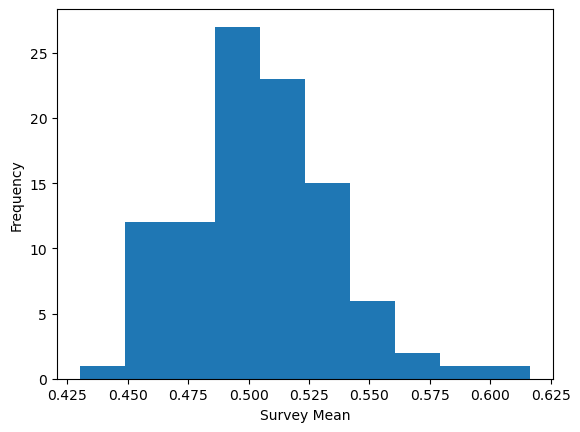

In [16]:
# Given code
np.random.seed(2950)

# B3: your code here
survey_means_300 = np.mean(np.random.choice(random_binomial, \
                            size = (100, 300), replace = True), axis = 1)
plt.hist(survey_means_300)
plt.xlabel('Survey Mean')
plt.ylabel('Frequency')
plt.show()

## Problem B7 (3 points)

- In one sentence, what do you notice about the histogram?
- In one sentence, how do you predict the margin of error and the confidence interval will change if we survey 300 people instead of 30?

**B7: Your answer here**
* The histogram has 10 bins and is slightly skewed right.
* If we survey 300 people instead of 30, I predict the margin of error to decrease and the confidence interval to become narrower.

## Problem B8 (3 points)
Let's test it out! Generate the 95% confidence interval of `survey_means_300` using [`np.percentile`](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html), and name this `conf_interval`.

Then, use indexing to calculate the “margin of error”: that is, half of the width of that confidence interval. Name this `margin_of_error`.

Print the confidence interval and the margin of error, each rounded to three decimal places.

Observe that the margin of error is smaller than before and no longer equivalent to $Z_{0.975} \approx 1.96$ times the standard error (`SE`) from B4. This is because we are now working with a larger sample size (300 instead of 30), which reduces the variability in the sample means. Instead, to calculate the margin of error manually, we would need to recalculate the SE of the boostrap distribution for `survey_means_300`.

In [17]:
# B8: your code here
conf_interval = np.percentile(survey_means_300, [2.5, 97.5])

margin_of_error = (conf_interval[1] - conf_interval[0]) / 2

print(f"Confidence Interval: {conf_interval.round(3)}")
print(f"Margin of Error: {margin_of_error.round(3)}")

Confidence Interval: [0.455 0.565]
Margin of Error: 0.055


**B8 Expected Output:**
```
Confidence Interval: [0.455 0.565]
Margin of Error: 0.055
```

# Section C: Understanding and Visualizing Probability Distributions

Throughout this section, we will be thinking about *academic publishing.* PhD students (like your TAs) and professors (like Prof. Koenecke) spend a lot of time writing articles, which they submit to journals or conferences for publication. If the article is good (and/or if the researchers get lucky), then the article gets published.

## Problem C1 (1 point)
For each scenario, provide the name of the model (Poisson, geometric, or negative binomial) that you think would be the best choice to simulate it. You should only use each model once.

1. The number of articles a PhD student must submit for publication until *one* is published
2. The number of articles a PhD student must submit for publication until *ten* are published
3. The number of articles a PhD student successfully publishes during the last three years of their PhD

**C1: your answer here**
1. geometric
2. negative binomial
3. poisson

## Problem C2 (4 points)

You submitted a paper for publication that was reviewed by 100 reviewers. The mean and median score that your paper received from reviewers were both 50 (out of a possible 100) points. The variance is 25 points. If you plot a histogram of your 100 reviews, it looks like a bell curve. 

Without writing any code:

1. What type of distribution might be a good representation for these scores? Explain your reasoning in 1-2 sentences.
2. About how many reviewers scored your paper below 50 points? Explain your reasoning in 1-2 sentences.
3. How many reviewers do you expect scored your paper between 45 points and 55 points on the exam? Explain your reasoning in 1-2 sentences.
4. About how many reviewers do you expect gave your paper a score above 65? Explain your reasoning in 1-2 sentences.

**C2: your answer here**
1. A normal distribution would be a good representation for these scores. Both the mean and median are the same and are at the center of the distribution, and the histogram of the reviews is a bell curve. 
2. Because both the mean and median score was 50/100, about 50 reviewers scored the paper below 50 points.
3. A variation of 25 means the standard deviation is 5, which also means that a reviewer would fall within one standard deviation of the mean if they scored the paper between 45 and 55 points. For a normal distribution like this, 68% of the reviewers would fall within one standard deviation, so about 68 reviewers scored the paper between 45 points and 55 points.
4. Scoring above 65 would be 3 standard deviations from the mean, which means that 0.3% of the reviewers (0.3 reviewers) would score either above a 65 or below a 35. Since we are only looking for how many reviewers scored above 65, this means that 0.15 reviewers is expected to have scored the paper above 65 (or 0/1 reviewers). 

## Problem C3 (3 points)

The geometric distribution shows the probability of having a certain number of trials before success. Create a function called `check_geometric_pmf`. This function should take two inputs:
1. Trial number (`k`)
2. Probability (`p`)

Based on those inputs, `check_geometric_pmf` should calculate the probability mass function (PMF) for the geometric model. The function should return this value. Make sure to write out the PMF fully (do not use a function from a Python module; implement the probability mass function written in the Probability Models Cheatsheet instead). 

Test your function to see the probability of a PhD student publishing a paper on their 3rd try, given a 25% probability of publication for each paper they submit. Print this probability, rounding to three decimals.

In [18]:
# C3: your function here
def check_geometric_pmf(k, p):
    pmf = p*(1 - p)**(k-1)
    return pmf

# C3: your test here
print(round(check_geometric_pmf(k = 3, p = 0.25), 3))

0.141


**C3 Expected Output:**
```
0.141
```

## Problem C4 (3 points)

The Poisson distribution shows the probability of have a certain number of successes within a fixed interval. Create a function called `check_poisson_pmf`. This function should take two inputs:
1. Trial number (`k`)
2. Rate parameter (`lam`)

Based on those inputs, `check_poisson_pmf` should calculate the probability mass function (PMF) for the Poisson model. The function should return this value. Make sure to write out the PMF fully (do not use a function from a Python module; implement the probability mass function written in the Probability Models Cheatsheet instead). 

Test your function to see the probability of publishing 3 papers in a year, given that on average, a PhD student publishes one paper a year. Print this probability, rounding to three decimals.

In [19]:
# C4: your function here
def check_poisson_pmf(k, lam):
    pmf = ((lam**k)*(math.e**(-lam)))/math.factorial(k)
    return pmf

# C4: your test here
print(round(check_poisson_pmf(k = 3, lam = 1), 3))

0.061


**C4 Expected Output:**
```
0.061
```

## Problem C5 (3 points)

The negative binomial distribution shows the probability of having a certain number of trials to reach a certain number of successes.
Create a function called `check_negative_binomial_pmf`. This function should take three inputs:
1. Trial number (`x`)
2. Number of successes (`r`)
3. Probability (`p`)

Based on those inputs, `check_negative_binomial_pmf` should calculate the probability mass function (PMF) for the negative binomial model. The function should return this value. Make sure to write out the PMF fully (do not use a function from a Python module; implement the probability mass function written in the Probability Models Cheatsheet instead). 

Test your function to see the probability that a PhD student has five papers published after submitting 10 papers, again given a 25% probability of publication for each paper they submit. Print this probability, rounding to three decimals.

*Hint:* You can use `scipy`'s [`comb`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html) function to implement the PMF. 

In [20]:
# C5: your function here
def check_negative_binomial_pmf(x, r, p):
    combination = comb(x - 1, r - 1)
    pmf = combination * ((1 - p)**(x - r))*(p**r)
    return pmf

# C5: your test here
print(round(check_negative_binomial_pmf(x = 10, r = 5, p = 0.25), 3))

0.029


**C5 Expected Output:**
```
0.029
```

## Problem C6 (6 points)
Use the function `check_poisson_pmf` to understand the impact of the $\lambda$ (the rate parameter) on the probability mass function of the Poisson distribution. To do this, let's simulate a PhD student's probability of publishing `k` papers a year given that, on average, a student publishes $\lambda$ papers per year, where $\lambda$ could take on the value `1`, the value `4`, or the value `10`. *We want to visualize the probability mass functions for each of the three $\lambda$ values in one figure.*

1. Create a variable called `publications` containing numbers from 0 to 20 using `range()`.
2. Create three empty lists: `prob_lambda_1`, `prob_lambda_4`, `prob_lambda_10` 
3. Write a for loop that loops over `publications`. For each value `k` of `publications`, calculate the probability that a PhD student will publish exactly `k` papers in a year using the function `check_poisson_pmf`. 
    - Calculate this value for $\lambda = 1$, and append this probability to `prob_lambda_1`
    - Calculate this value for $\lambda = 4$, and append this probability to `prob_lambda_4`
    - Calculate this value for $\lambda = 10$, and append this probability to `prob_lambda_10`
4. After the for loop, visualize the probabilities in a line graph:
    - Name the x-axis `Papers` and the y-axis `Probability`. 
    - Plot `prob_lambda_1` as a red line labeled `lambda = 1`
    - Plot `prob_lambda_4` as a green line labeled `lambda = 4`
    - Plot `prob_lambda_10` as a blue line labeled `lambda = 10`
    - Call `plt.xticks(ticks=publications)` to ensure that there is a numeric label for each value on the x-axis.
    - Call `plt.legend` to show the line's labels

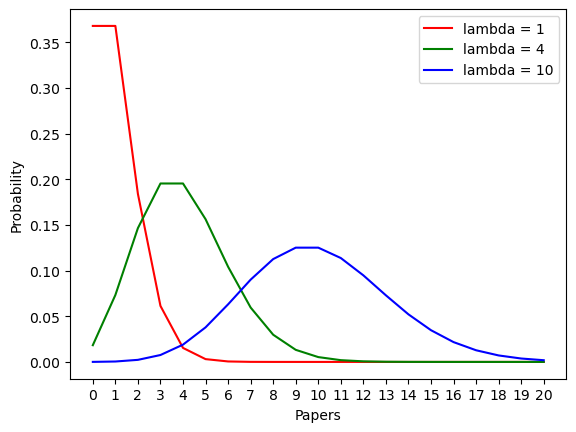

In [21]:
# C6 part 1: your code here
publications = range(0, 21)

# C6 part 2: your code here
prob_lambda_1 = []
prob_lambda_4 = []
prob_lambda_10 = []

# C6 part 3: your code here
for k in publications:
    prob_lambda_1.append(check_poisson_pmf(k = k, lam = 1))
    prob_lambda_4.append(check_poisson_pmf(k = k, lam = 4))
    prob_lambda_10.append(check_poisson_pmf(k = k, lam = 10))
    
# C6 part 4: your code here
plt.plot(prob_lambda_1, color = 'red', label = 'lambda = 1')
plt.plot(prob_lambda_4, color = 'green', label = 'lambda = 4')
plt.plot(prob_lambda_10, color = 'blue', label = 'lambda = 10')

plt.xlabel('Papers')
plt.ylabel('Probability')
plt.xticks(ticks=publications)
plt.legend()
plt.show()

## Problem C7 (2 points)
What do you notice about the relationship between $\lambda$ and the PMF? Answer in one sentence. 

**C7: your answer here**
* As $\lambda$ increases, the PMF becomes more normally distributed.  

## Problem C8 (3 points)

In the provided dataframe below we have data on the scientific productivity of PhD students ([source](https://rdrr.io/cran/scar/man/PhDPublications.html)). The column "articles" indicates the number of articles published in the last three years of their PhD.

Create a histogram with `plt.hist()` indicating the number of PhD students (y-axis) for each number of articles published (x-axis), with 20 bins. Name the axes `# of articles published` and `# of students`.

In [22]:
# Given code
publication_df = pd.read_csv('PhDPublications.csv')
print(f'There are {len(publication_df)} students')
publication_df.head()

There are 915 students


,articles,gender,married,kids,prestige,mentor
0,0,male,yes,0,2.52,7
1,0,female,no,0,2.05,6
2,0,female,no,0,3.75,6
3,0,male,yes,1,1.18,3
4,0,female,no,0,3.75,26


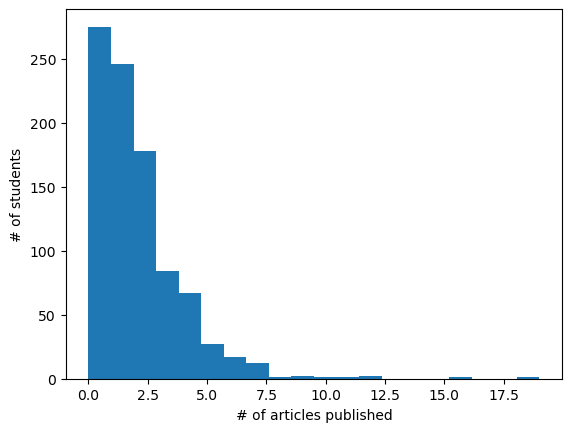

In [23]:
# C8: your code here
plt.hist(x = publication_df['articles'], bins = 20)
plt.xlabel('# of articles published')
plt.ylabel('# of students')
plt.show()

## Problem C9 (4 points)

In 1905, Albert Einstein had an "annus mirabilis," publishing 4 seminal papers. [Wikipedia](https://en.wikipedia.org/wiki/List_of_scientific_publications_by_Albert_Einstein) indicates he published 6 papers in total during the last three years of his PhD.

Create a numpy array called `draws` containing 1000 draws from the `np.random.poisson` function, using the average number of articles published per student as your event rate. Create a histogram of these draws. Set the number of bins to 5.

Then, use [`plt.axvline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html) to overlay a red, dotted, vertical line indicating the number of articles published by Albert Einstein in the last three years of his PhD. Use [`plt.annotate()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) to annotate the line as `Einstein` in red. Annotations have an argument `xy` that specifies the position of the text. For readability, we want to offset the text slightly, so position the annotation at `(6.1,30)`.

We've already included a random seed of `2950` at the top. Make sure to keep this line of code!

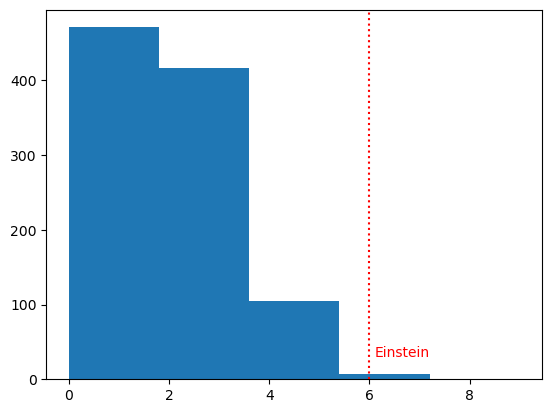

In [24]:
# Given random seed
np.random.seed(2950)

# C9: your code here
total_articles = publication_df['articles'].sum()
total_students = len(publication_df)
avg_articles = total_articles / total_students

draws = np.random.poisson(lam = avg_articles, size = 1000)

plt.hist(x = draws, bins = 5)
plt.axvline(x = 6, color = 'red', linestyle = 'dotted')
plt.annotate(text = 'Einstein', color = 'red', xy = (6.1, 30))
plt.show()

## Problem C10 (3 points)

Using the same event rate parameter as before (i.e. the average number of articles published per student), what is the probablity that a PhD student publishes the same number of articles as Albert Einstein did in the last three years of their PhD?

Use your `check_poisson_pmf` function to calculate the probability. Print the probability, rounded to five decimal places.

In [25]:
# C10: your code here
print(round(check_poisson_pmf(k = 6, lam = avg_articles), 5))

0.00601


**C10 Expected Output:**
```
0.00601
```

## Problem C11 (3 points)

With the same distribution (i.e. using the same probability model), what is the probability that a student publishes *more than* 6 articles in the last three years of their PhD?

Hint: use `sf()`, standing for survival function, from `scipy.stats` for the Poisson distribution. The survival function is defined as 1 minus the cumulative distribution function value. Print the probability, rounded to five decimal places.

In [26]:
# C11: your code here
print(round(poisson.sf(6, avg_articles), 5))

0.00183


**C11 Expected Output:**
```
0.00183
```

# Section D: Joint and Conditional Probabilities, Bayes' Rule

In this final section, we'll use a dataset describing the Chicago White Sox's 2024 season, which, as you may have heard, broke the record for the losingest season in MLB history. We're going to use data on how many runs the White Sox and their opponent scored in each game, which comes from [ESPN](https://www.espn.com/mlb/team/schedule/_/name/chw/seasontype/2/half/1). 

The data are represented by a 2D grid where indices (indexed starting at 0) correspond to the number of runs scored by the White Sox (rows) and their opponents (columns). The number of games where the White Sox scored `i` runs and their opponent scored `j` runs can be found in the cell `white_sox[i][j]`. 

For example, `white_sox[3, 4]` indicates the number of games where the White Sox scored `3` goals and their opponent scored `4` goals. You can see there are `8` games where this was the final score. (You will notice that the values in the upper triangle of this array are bigger than the values in the lower triangle, because the White Sox usually lost most of their games this season, which means that their opponents usually scored more runs than them.)

This array is of size `(15, 15)`, meaning that the range of runs scored by either the White Sox or their opponent (in any match) is between 0 and 14. 

In this homework, we'll refer to variables `W` and `T` to denote the number of goals scored by the **W**hite Sox and the Other **T**eam, respectively. Remember that `W` and `T` can each take any integer value between `0` and `14`.

In [27]:
# Given code
white_sox = np.array([[0, 1, 4, 3, 2, 3, 0, 3, 0, 2, 1, 0, 0, 0, 0],
                      [1, 0, 5, 4, 7, 4, 3, 2, 0, 0, 1, 1, 0, 0, 0],
                      [2, 1, 0, 6, 3, 1, 3, 2, 2, 1, 3, 1, 0, 0, 1],
                      [0, 2, 5, 0, 8, 6, 7, 0, 0, 1, 1, 0, 0, 1, 0],
                      [2, 1, 1, 2, 0, 1, 3, 1, 2, 2, 0, 1, 0, 1, 0],
                      [1, 3, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 2, 0, 0],
                      [0, 1, 1, 1, 0, 1, 0, 6, 2, 0, 0, 0, 0, 0, 0],
                      [1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0],
                      [0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [28]:
# Given code
print(white_sox.shape)
print(white_sox)

(15, 15)
[[0 1 4 3 2 3 0 3 0 2 1 0 0 0 0]
 [1 0 5 4 7 4 3 2 0 0 1 1 0 0 0]
 [2 1 0 6 3 1 3 2 2 1 3 1 0 0 1]
 [0 2 5 0 8 6 7 0 0 1 1 0 0 1 0]
 [2 1 1 2 0 1 3 1 2 2 0 1 0 1 0]
 [1 3 0 1 1 0 2 1 1 1 1 0 2 0 0]
 [0 1 1 1 0 1 0 6 2 0 0 0 0 0 0]
 [1 0 2 0 0 1 1 0 0 0 0 0 0 1 0]
 [0 1 1 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


## Problem D1 (2 points)
We can think about `the losingest season in MLB history` statistically by reframing "games" as "trials". `N` represents the total number of trials (i.e., the total number of games that the White Sox played this season). 

Use `numpy` to calculate the total number of games played by the White Sox this season. Save this value as `N` and print it. Make sure to label it as `N` by printing `N:` and then the number.

*Hint:* The total number of games that the White Sox played can be decomposed into discrete, mutually exclusive events: (the number of games in which the White Sox scored 0 runs AND the other team scored 0 runs) + (the number of games in which they scored 0 runs AND the other team scored 1 runs) + (the number of games in which they scored 0 runs AND the other team scored 2 runs) + $\ldots$


In [29]:
# D1: your code here
N = np.sum(white_sox)
print(f"N: {N}")

N: 162


**D1 Expected Output**
```
N: 162
```

## Problem D2 (2 points)

In this problem, we will calculate **joint probabilities**. 

The probability that `W` will take the value `i` (i.e. that the White Sox will score `i` runs in a game) and, simultaneously, that `T` will take the value `j` (i.e. that the other team will score `j` runs in that same game) is denoted `Pr(W = i, T = j)` and is called the joint probability of `W = i` and `T = j`. 

Compute the joint probablity `Pr(W = 3, T = 4)`. In other words, this is the probability that, in a given game, the White Sox score `3` runs and the other team scores `4` runs.

Print the joint probability, rounded to three decimals. Make sure to label it as `Pr(W = 3, T = 4)` by printing `Pr(W = 3, T = 4):` and then the number.

*Hint:* You should use basic array indexing plus the variable `N` that you created in problem D1 to answer this question.


In [30]:
# D2: your code here
joint_prob_W3_T4 = white_sox[3, 4] / N

print(f"Pr(W = 3, T = 4): {round(joint_prob_W3_T4, 3)}")

Pr(W = 3, T = 4): 0.049


## Problem D3 (3 points)

`Pr(W = i)` can be derived by **marginalizing** the random variable from the joint probability computed in the previous problem. In other words, the sum of `Pr(W = i, T = j)` across all possible values of `j` that `T` could take on is equal to the probability that `W` takes on value `i`. 

Compute the probability `Pr(W = 3)`, i.e., the probability that the White Sox score 3 runs in a game. 

Print this probability, rounded to three decimals. Make sure to label it as `Pr(W = 3)` by printing `Pr(W = 3):` and then the number.

*Hint:* You should use basic array indexing, `numpy`'s `sum` function, and the variable `N` that you created in problem D1 to answer this question.

In [31]:
# D3: your code here
games_W3 = np.sum(white_sox[3])
prob_W3 = games_W3 / N

print(f"Pr(W = 3): {round(prob_W3, 3)}")

Pr(W = 3): 0.191


## Problem D4 (3 points)

In this problem, we will calculate **conditional probabilities**. 

The probability that `W` will take the value `i` (i.e. that the White Sox will score `i` runs in a game) *given that we have observed that `T` has taken on the value `j`* (i.e. that the other team scored `j` runs in that game) is denoted as as `Pr(W = i | T = j)` and is called the conditional probability of `W = i` given `T = j`.

Compute the conditional probability `Pr(W = 3 | T = 4)`. In other words, this is the probability that the White Sox score `3` runs *given that we have observed that the other team scored `4` runs*. Save this value to a variable called `prob_W3_given_T4`. 

You can calculate the conditional probability based on joint probabilities: $$\Pr \left[ A | B \right] = \frac{\Pr \left[ A, B \right]}{\Pr \left[ B \right]}$$

Print the `prob_W3_given_T4`, rounded to three decimals. Make sure to label it as `Pr(W = 3 | T = 4)` by printing `Pr(W = 3 | T = 4):` and then the number.

*Hint:* You should use basic array indexing and `numpy`'s `sum` function to answer this question.

In [32]:
# D4: your code here
prob_T4 = np.sum(white_sox[:, 4]) / N
prob_W3_given_T4 = joint_prob_W3_T4 / prob_T4

print(f"Pr(W = 3 | T = 4): {round(prob_W3_given_T4, 3)}")

Pr(W = 3 | T = 4): 0.348


## Problem D5 (3 points)

Using Bayes' rule, calculate the conditional probability `Pr(T = 4 | W = 3)`. In other words, this is the probability that other team scores `4` runs *given that we have observed that the the White Sox scored `3` runs*. Save this value to a variable called `prob_T4_given_W3_Bayes`. 

**Do not calculate this using joint probabilities. Instead, use Bayes' Rule:**

$$\Pr \left[ A | B \right] = \frac{\Pr \left[ B | A \right] \Pr \left[ A \right] }{\Pr \left[ B \right]}$$

Print the `prob_T4_given_W3_Bayes`, rounded to three decimals. Make sure to label it as `Pr(T = 4 | W = 3)` by printing `Pr(T = 4 | W = 3):` and then the number.

*Hint:* You should use basic array indexing, `numpy`'s `sum` function, and the variable `prob_W3_given_T4` that you created in problem D4 to answer this question.

In [33]:
# D5: your code here
prob_W3 = games_W3 / N
prob_T4 = np.sum(white_sox[:, 4]) / N
prob_T4_given_W3_Bayes = (prob_W3_given_T4 * prob_T4) / prob_W3

print(f"Pr(T = 4 | W = 3): {round(prob_T4_given_W3_Bayes, 3)}")

Pr(T = 4 | W = 3): 0.258


## Problem D6 (3 points)

Finally, recalculate the conditional probability `Pr(T = 4 | W = 3)` using joint probabilities and save this value to a variable called `prob_T4_given_W3_joint`. 

Print the `prob_T4_given_W3_joint`, rounded to three decimals. Make sure to label it as `Pr(T = 4 | W = 3)` by printing `Pr(T = 4 | W = 3):` and then the number. 

Your response should be identical to your response to the previous problem.

*Hint:* You should use basic array indexing and `numpy`'s `sum` function to answer this question.

In [34]:
# D6: your code here
prob_W3 = games_W3 / N
prob_T4_given_W3_joint = joint_prob_W3_T4 / prob_W3

print(f"Pr(T = 4 | W = 3): {round(prob_T4_given_W3_joint, 3)}")

Pr(T = 4 | W = 3): 0.258
